### Julia-Mengen

Die Julia-Menge ist einer der meist gebildeten Fraktale, erstmals behandelt von Gaston Maurice Julia im "Memoire sur l'iteration des functions rationelles". Dabei war es ein Resultat der Suche nach einem allgemeinen Verfahren, dass die Wurzel bestimmt die gegen die Iteration mit Startwert z konvergiert. Erst im Jahr 1920 war es Gaston M. Julia und Pierre Fatou gelungen mit ihrer Theorie der Iterationen rationaler Funktionen in der komplexen Ebene das Problem zu lösen. Jedoch war es ihnen aufgrund von fehlenden Berechnungsmöglichkeiten nicht möglich die Julia-Mengen zu visualisieren. Danach dauerte es bis 1977, als dem Franzosen Benoit Mandelbrot mithilfe von Computergrafik gelang eine Visualisierung zu erstellen. Diese fand aufgrund ihrer Struktur viel Anklang in der Mathematiker-Welt aber auch, durch die Farbenfroheit, bei den Künstlern.
Die Menge ist benannt nach Gaston M. Julia.

Bei der Julia-Menge handelt es sich, um eine andere Betrachtungsweise der Mandelbrot-Rekursion, wobei die gleiche Folgenbildung genutzt wird: 

$f(z) = z^2 + c$ 

$f(f(z)) = f(z)^2 + c$

...

Einfach ausgedrückt ist die Julia-Menge definiert als die Grenzmenge der Startwerte, deren Funktionswerte während der Rekursion den Fluchtkreis verlassen. 

Dabei werden alle Werte innerhalb des Fluchtkreises auf diese Eigenschaft überprüft. Eine Julia-Menge bildet somit den Rand der Gefangenenmenge, die alle Startwerte enthält, bei denen die Funktionswerte auch nach mehr als 1000 Iterationen den Fluchtkreis nicht verlassen.

In den vorliegenden Beispielen wird die Gefangenenmenge immer in Schwarz dargestellt, die farbige Darstellung bildet die ausgefüllte Julia-Menge.

Die Berechnung der Julia-Menge lässt sich in drei Schritte aufteilen: 

    1. Festlegen der Funktion & Festlegung des Parameters c (Für jeden Punkt c der komplexen Ebene wird eine eigene Julia-Menge berechnet).
    2. Durchführen des Algorithmus 
    3. Färben der Startwerte
    
Der Algorithmus funktioniert folgendermaßen:

    1. Folgenbildung: Starte mit einem Startwert z0 und führe die bekannte Rekursion (siehe Mandelbrotmenge) durch.
    2. Überprüfung des Fluchtkreises: Wenn der Betrag ∣zn∣ während der Iterationen größer als 2 wird, verlässt der Startwert den Fluchtkreis.

Färben des Startwertes:

    Der Startwert wird entsprechend der Anzahl der Iterationen, bei denen der Fluchtkreis verlassen wurde, eingefärbt.   
    Wenn der Startwert auch nach 1000 Iterationen den Fluchtkreis nicht verlässt, wird er in Schwarz gefärbt. Er gehört damit zur Gefangenenmenge.
    

Nach dem Färben lassen sich die Eigenschaften von oben leicht überprüfen. Die Startwerte, die nun schwarz gefärbt wurden, sind Teil der Gefangenenmenge, da sie nach der maximalen Iteration nicht der Fluchtkreis verlassen haben. Die gefärbten Startwerte sind Teil der ausgefüllten Julia-Menge und die Grenzwerte zwischen den beiden Mengen bildet die Julia-Menge.

Die Struktur der Julia-Menge hängt vom Parameter c ab: 

    Wenn c innerhalb des Apfelmännchen liegt, ist die Julia-Menge zusammenhängend. 
    Wenn c außerhalb des Apfelmännchens liegt, ist die Julia-Menge nicht zusammenhängend.

Der Unterschied zur Mandelbrotmenge liegt dabei darin, dass verschiedene Startwerte überprüft werden und der Parameter c unverändert bleibt.

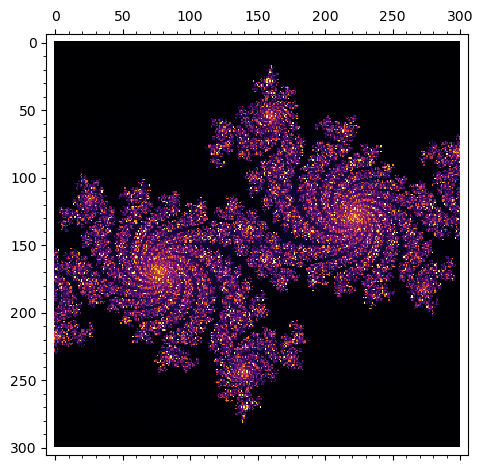

In [1]:
import numpy as np
from matplotlib.colors import Normalize

def julia_set(width, height, c, max_iter):
    
    image = np.zeros((height, width))
    
    # Create points for a 2x2 square in which the Fluchtkreis is set
    x_range = np.linspace(-2, 2, width)
    y_range = np.linspace(-2, 2, height)

    # For every point in the Fluchtkreis
    for x in range(width):
        for y in range(height):
            zx = x_range[x] * 0.5
            zy = y_range[y] * 0.5
            if zx**2 + zy**2 <= 4 : #Continiue as long as the point is part of the Fluchtkreis
                z = complex(zx, zy)
                iteration = 0
                while abs(z) < 4 and iteration < max_iter: # Continiue while the new value is still in the Fluchtkreis and iteration is lower than max_iter
                    z = z*z + c
                    iteration += 1
                color_value = iteration / max_iter # Connect the color_value 
                image[y, x] = color_value #mark the point
    return image

def plot_julia_set(image):
    normalized_image = (image * 255).astype(np.uint8)
    
    # Convert the numpy array to a SageMath matrix
    sage_matrix = Matrix(normalized_image.tolist())
    
    # Plot the matrix using SageMath's matrix_plot
    plot = matrix_plot(sage_matrix, cmap="inferno")
    return plot




width, height = 300, 300  # How many points we want to look at in the circle 
c = -0.7 + 0.27015j  # start value 
max_iter = 1000  # Maximum iterations for each point
image = julia_set(width, height,c, max_iter)
plot_julia_set(image)



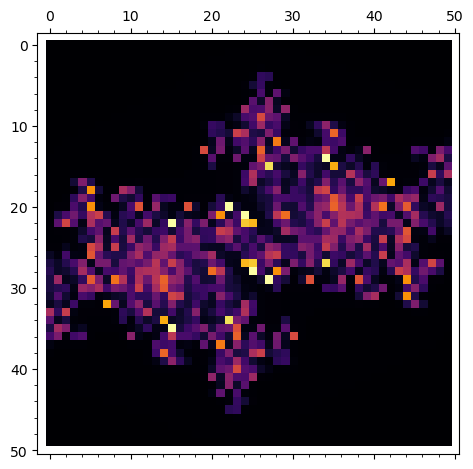

In [2]:
width, height = 50, 50  # How many points we want to look at in the circle 
c = -0.7 + 0.27015j  # start value 
max_iter = 1000  # Maximum iterations for each point
image = julia_set(width, height,c, max_iter)
plot_julia_set(image)

Anhand von dieser Grafik lässt sich eindeutig erkennen, dass jeder Pixel und damit auch jeder Startwert durch die Mandelbrot-Rekursion mit gleichen c durchgeführt wird und dadurch eingefärbt wird.

Wenn der Parameter c nun in der gleichen Funktion geändert wird, kann nicht vorhergesagt werden wie sich die Grafik und damit die Julia Menge ändern wird. 

Animation with 100 frames
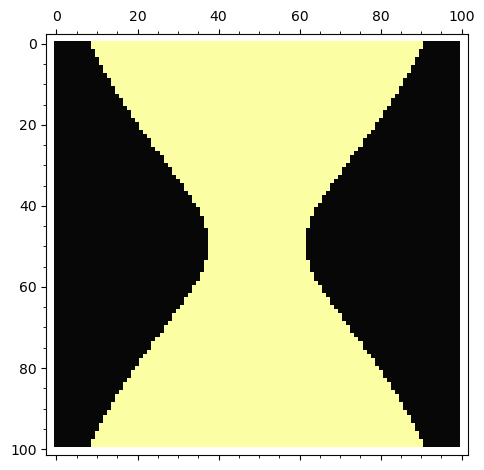

In [3]:
width, height = 100, 100  # How many points we want to look at in the circle 
max_iter = 100  # Maximum iterations for each point
frames = 100
interval = 50
c_values = [complex(0.7885 * np.cos(t / 20) * 5, 0.7885 * np.sin(t / 20)) for t in range(frames)]
plotlis = []
for c in c_values : 
    plotlis.append(plot_julia_set(julia_set(width, height,c, max_iter))) 
ani = animate(plotlis)
ani.show()

Die verschiedenen Grafiken bilden Julia Mengen für die gleiche Funktion für unterschiedliche Parameter c. Durch die Abbildungen wird schnell deutlich, dass die Mengen im Verhalten sich nicht ähneln. Der Parameter c lässt nicht nur die Bilder unterschiedlich aussehen, die Grenze zwischen dem gefärbten Teilbereich und dem schwarzen Teilbereich verschieben sich ebenfalls. Es lässt sich festhalten, dass es sich um verschiedene Julia-Mengen handelt. Dementsprechend gibt es zu einer Mandelbrotmenge, unendlich viele Julia-Mengen.

### Übungsaufgaben 

#### Aufgabe 1
Zeichnen Sie die Julia Menge in die gegebene Grafik ein.

<img src="picture1.png" alt="drawing" width="300"/>

<img src="picture2.jpeg" alt="drawing" width="300"/>

#### Lösungen: 
<img src="Losung1.jpeg" alt="drawing" width="300"/>

<img src="Losung2.jpeg" alt="drawing" width="300"/>

#### Aufgabe 2
Wird die Funktion $f(z) = z^2 + c$ bei $z0 = 0$ und $c = 1 + 0i$ den Fluchtkreis verlassen? Mit welchem Farbwert wird der Startpunkt eingefärbt?

#### Lösung:
Bei der ersten Iteration wird der Fluchtkreis bereits verlassen, dementsprechend wird der Startwert 0 für den gegebenen Parameter c mit dem Farbwert $1/1000$ gefärbt.

#### Aufgabe 3
Wir erstellen nun eine Julia-Menge aus der Voraussetzungn der Aufgabe 2. Geben Sie den festen Wert und den Variablenwert der gegebenen Julia Menge von oben an.

#### Lösung:
Der feste Wert bei einer Julia-Menge ist immer der Parameter c, dieser verändert sich während der gesamten Berechnung der Menge nicht. Wenn ein neuer Wert für den Parameter c gewählt wird handelt es sich um eine weitere Julia-Menge. Der Wert z der Startwert wird für alle Punkte im Fluchtkreis iteriert, für jedes der Punkte wird die Rekursion durchgeführt. 

#### Aufgabe 4

Wie unterscheiden sich die Mandelbrotmenge und die Julia-Menge im Wesentlichen?

#### Lösung

Die Mandelbrotmenge und die Julia-Menge unterscheiden sich in der Veränderung der Paramter. Der Parameter c ist in der Julia-Menge festgelegt, hingegen wird der Startwert verändert und die Iteration wird für den jeweiligen Startwert durchgeführt. In der Mandelbrotmenge ist der Startwert festgelegt und der Parameter c wird angepasst.